In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

In [2]:
#LIST OF TEAMS
teams = ['america', 'athletico', 'atletico', 'bahia', 'botafogo', 'bragantino', 'corinthians', 'coritiba', 'cruzeiro', 'cuiaba', 
         'flamengo', 'fluminense', 'fortaleza', 'goias', 'gremio', 'internacional', 'palmeiras', 'santos', 'saopaulo', 'vasco']

In [3]:
#GET DATA PATHS AND GENERATE LIST OF FINAL POINTS
file_names = os.listdir('./data')
paths = []
for file_name in file_names:
    file_path = os.path.join('./data', file_name)
    paths.append(file_path)
    
final_predictions = [0] * 20
features_by_club = [[]] * 20

In [4]:
#PROCESS SELECT TRAIN AND TEST SAMPLE
def regression_brasileirao(df_team, feature_team, team):
    miss = 0
    for year in list(df_team[df_team.index > 2008].index):
        if (min(df_team.index) > 2008 and year == min(df_team.index)):
            year=list(df_team.index)[1];
        
        x_train = df_team[df_team.index < year][feature_team]
        y_train = df_team[df_team.index < year]['PONTOS']
        x_test = df_team.loc[year][feature_team].values.reshape(1, -1)

        
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_test = model.predict(x_test)
        
        if (year != 2023):
            miss += abs(y_test - df_team.loc[year]['PONTOS'])
        else:
            final_predictions[teams.index(team)] = y_test[0]
        
    mean_miss = miss/len(df_team)
    print(mean_miss)
    print(y_test)
    print(model.coef_)

In [5]:
#SANTOS PREDICTION

#GET DATA AND DROP RELEGATIONS
df_santos = pd.read_csv(paths[teams.index('santos')]).set_index('ANO')
for value, index in zip(list(df_santos['PONTOS']), list(df_santos.index)):
    if value == 0.0:
        df_santos = df_santos.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'ESTADUAL', 'TMPTECDIA']
features_by_club[teams.index('santos')] = features

#RUN PROCESS
regression_brasileirao(df_santos, features, 'santos')


[4.93731503]
[46.53585936]
[ 0.32013633 -0.78637135  0.00704745]


In [6]:
#SAOPAULO PREDICTION

#GET DATA AND DROP RELEGATIONS
df_saopaulo = pd.read_csv(paths[teams.index('saopaulo')]).set_index('ANO')
for value, index in zip(list(df_saopaulo['PONTOS']), list(df_saopaulo.index)):
    if value == 0.0:
        df_saopaulo = df_saopaulo.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'TMPTECDIA']
features_by_club[teams.index('saopaulo')] = features

#RUN PROCESS
regression_brasileirao(df_saopaulo, features, 'saopaulo')

[6.14586492]
[65.91772589]
[-1.10588969  1.04649913  0.01222435]


In [7]:
#INTERNACIONAL PREDICTION
df_internacional = pd.read_csv(paths[teams.index('internacional')]).set_index('ANO')
for value, index in zip(list(df_internacional['PONTOS']), list(df_internacional.index)):
    if value == 0.0:
        df_internacional = df_internacional.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'MM3_DEF', 'MEDPUB']
features_by_club[teams.index('internacional')] = features

#RUN PROCESS
regression_brasileirao(df_internacional, features, 'internacional')

[9.36062865]
[62.49199733]
[-1.27206872e+00  1.23819342e+00 -3.57722334e-01  3.39653960e-04]


In [8]:
#CORINTHIANS PREDICTION
df_corinthians = pd.read_csv(paths[teams.index('corinthians')]).set_index('ANO')
for value, index in zip(list(df_corinthians['PONTOS']), list(df_corinthians.index)):
    if value == 0.0:
        df_corinthians = df_corinthians.drop(index)

#FEATURE SELECTION
features = ['MM3_ATK', 'MM3_DEF', 'MEDPUB', 'PRECO']
features_by_club[teams.index('corinthians')] = features

#RUN PROCESS
regression_brasileirao(df_corinthians, features, 'corinthians')

[10.63535104]
[68.8099169]
[-0.28829668 -0.15360896  0.00053815 -0.05675581]


In [9]:
#CORITIBA PREDICTION
df_coritiba = pd.read_csv(paths[teams.index('coritiba')]).set_index('ANO')
for value, index in zip(list(df_coritiba['PONTOS']), list(df_coritiba.index)):
    if value == 0.0:
        df_coritiba = df_coritiba.drop(index)

#FEATURE SELECTION
features = ['MM3_ATK', 'MM3_DEF', 'ESTADUAL', 'MEDPUB']
features_by_club[teams.index('coritiba')] = features

#RUN PROCESS
regression_brasileirao(df_coritiba, features, 'coritiba')

[6.31745085]
[39.24920725]
[ 6.71451671e-01 -5.11196939e-01 -1.93965594e+00  7.70157473e-04]


In [10]:
#CRUZEIRO PREDICTION
df_cruzeiro = pd.read_csv(paths[teams.index('cruzeiro')]).set_index('ANO')
for value, index in zip(list(df_cruzeiro['PONTOS']), list(df_cruzeiro.index)):
    if value == 0.0:
        df_cruzeiro = df_cruzeiro.drop(index)

#FEATURE SELECTION
features = ['MM3_ATK', 'MM3_DEF', 'MEDPUB', 'PRECO']
features_by_club[teams.index('cruzeiro')] = features

#RUN PROCESS
regression_brasileirao(df_cruzeiro, features, 'cruzeiro')

[9.05542935]
[47.81245252]
[-0.04663473  0.56475344  0.00110949  0.15060391]


In [11]:
#BAHIA PREDICTION
df_bahia = pd.read_csv(paths[teams.index('bahia')]).set_index('ANO')
for value, index in zip(list(df_bahia['PONTOS']), list(df_bahia.index)):
    if value == 0.0:
        df_bahia = df_bahia.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'MEDPUB', 'PRECO', 'TMPTECDIA']
features_by_club[teams.index('bahia')] = features

#RUN PROCESS
regression_brasileirao(df_bahia, features, 'bahia')

[9.97343924]
[54.29499261]
[-9.54568788e-01  1.02625251e+00  3.52100027e-04  6.84669700e-02
  9.24855916e-03]


In [12]:
#BOTAFOGO PREDICTION
df_botafogo = pd.read_csv(paths[teams.index('botafogo')]).set_index('ANO')
for value, index in zip(list(df_botafogo['PONTOS']), list(df_botafogo.index)):
    if value == 0.0:
        df_botafogo = df_botafogo.drop(index)

#FEATURE SELECTION
features = ['ESTADUAL', 'MEDPUB', 'TMPTECDIA']
features_by_club[teams.index('botafogo')] = features

#RUN PROCESS
regression_brasileirao(df_botafogo, features, 'botafogo')

[5.99868124]
[58.73549265]
[-2.33618459e+00  9.38054737e-04  8.72840561e-03]


In [13]:
#VASCO PREDICTION
df_vasco = pd.read_csv(paths[teams.index('vasco')]).set_index('ANO')
for value, index in zip(list(df_vasco['PONTOS']), list(df_vasco.index)):
    if value == 0.0:
        df_vasco = df_vasco.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MEDPUB', 'TMPTECDIA']
features_by_club[teams.index('vasco')] = features

#RUN PROCESS
regression_brasileirao(df_vasco, features, 'vasco')

[8.90515446]
[57.84335108]
[-0.17502028  0.00043748  0.02667875]


In [14]:
#BRAGANTINO PREDICTION
df_bragantino = pd.read_csv(paths[teams.index('bragantino')]).set_index('ANO')
for value, index in zip(list(df_bragantino['PONTOS']), list(df_bragantino.index)):
    if value == 0.0:
        df_bragantino = df_bragantino.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS']
features_by_club[teams.index('bragantino')] = features

#RUN PROCESS
regression_brasileirao(df_bragantino, features, 'bragantino')

[5.28813559]
[42.70718383]
[-0.25129746]


In [15]:
#GRÊMIO PREDICTION
df_gremio = pd.read_csv(paths[teams.index('gremio')]).set_index('ANO')
for value, index in zip(list(df_gremio['PONTOS']), list(df_gremio.index)):
    if value == 0.0:
        df_gremio = df_gremio.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'MEDPUB', 'TMPTECDIA']
features_by_club[teams.index('gremio')] = features

#RUN PROCESS
regression_brasileirao(df_gremio, features, 'gremio')

[7.15750191]
[63.2270373]
[0.07467646 0.23539752 0.00144264 0.01720187]


In [17]:
#FORTALEZA PREDICTION
df_fortaleza = pd.read_csv(paths[teams.index('fortaleza')]).set_index('ANO')
for value, index in zip(list(df_fortaleza['PONTOS']), list(df_fortaleza.index)):
    if value == 0.0:
        df_fortaleza = df_fortaleza.drop(index)

#FEATURE SELECTION
features = ['MM3_DEF', 'ESTADUAL', 'MEDPUB', 'PRECO', 'TMPTECDIA']
features_by_club[teams.index('fortaleza')] = features

#RUN PROCESS
regression_brasileirao(df_fortaleza, features, 'fortaleza')

[8.0341383]
[44.63753583]
[-2.43811328e-01 -1.52678035e-02  3.64832758e-04  3.87094477e-01
 -3.33454749e-02]


In [18]:
#CUIABÁ PREDICTION
df_cuiaba = pd.read_csv(paths[teams.index('cuiaba')]).set_index('ANO')
for value, index in zip(list(df_cuiaba['PONTOS']), list(df_cuiaba.index)):
    if value == 0.0:
        df_cuiaba = df_cuiaba.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'MM3_DEF']
features_by_club[teams.index('cuiaba')] = features

#RUN PROCESS
regression_brasileirao(df_cuiaba, features, 'cuiaba')

[4.]
[35.2538299]
[-0.17926808 -0.12902735 -0.1404457 ]


In [19]:
#AMÉRICA PREDICTION
df_america = pd.read_csv(paths[teams.index('america')]).set_index('ANO')
for value, index in zip(list(df_america['PONTOS']), list(df_america.index)):
    if value == 0.0:
        df_america = df_america.drop(index)

#FEATURE SELECTION
features = ['TMPTECDIA']
features_by_club[teams.index('america')] = features

#RUN PROCESS
regression_brasileirao(df_america, features, 'america')

[9.32848889]
[46.24620987]
[-0.03928359]


In [20]:
#ATLÉTICO PREDICTION
df_atletico = pd.read_csv(paths[teams.index('atletico')]).set_index('ANO')
for value, index in zip(list(df_atletico['PONTOS']), list(df_atletico.index)):
    if value == 0.0:
        df_atletico = df_atletico.drop(index)

#FEATURE SELECTION
features = ['MEDPUB', 'ESTADUAL', 'PRECO']
features_by_club[teams.index('atletico')] = features

#RUN PROCESS
regression_brasileirao(df_atletico, features, 'atletico')

[8.87847683]
[71.90742024]
[ 2.77438238e-04 -6.88710209e+00  8.38654433e-02]


In [21]:
#FLAMENGO PREDICTION
df_flamengo = pd.read_csv(paths[teams.index('flamengo')]).set_index('ANO')
for value, index in zip(list(df_flamengo['PONTOS']), list(df_flamengo.index)):
    if value == 0.0:
        df_flamengo = df_flamengo.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_DEF', 'MEDPUB', 'PRECO']
features_by_club[teams.index('flamengo')] = features

#RUN PROCESS
regression_brasileirao(df_flamengo, features, 'flamengo')

[10.46857107]
[68.45338449]
[ 1.90783336e-01 -6.42980167e-01  3.16593502e-04  3.39321948e-03]


In [22]:
#FLUMINENSE PREDICTION
df_fluminense = pd.read_csv(paths[teams.index('fluminense')]).set_index('ANO')
for value, index in zip(list(df_fluminense['PONTOS']), list(df_fluminense.index)):
    if value == 0.0:
        df_fluminense = df_fluminense.drop(index)

#FEATURE SELECTION
features = ['MM3_ATK', 'ESTADUAL', 'MEDPUB']
features_by_club[teams.index('fluminense')] = features

#RUN PROCESS
regression_brasileirao(df_fluminense, features, 'fluminense')

[10.96383969]
[62.92558366]
[ 2.07146405e-01 -2.22018397e+00  1.21432536e-04]


In [23]:
#PALMEIRAS PREDICTION
df_palmeiras = pd.read_csv(paths[teams.index('palmeiras')]).set_index('ANO')
for value, index in zip(list(df_palmeiras['PONTOS']), list(df_palmeiras.index)):
    if value == 0.0:
        df_palmeiras = df_palmeiras.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_ATK', 'MEDPUB', 'PRECO']
features_by_club[teams.index('palmeiras')] = features

#RUN PROCESS
regression_brasileirao(df_palmeiras, features, 'palmeiras')

[9.42254641]
[84.08955024]
[-8.35485369e-01  1.25798232e+00  6.53810155e-04  1.83178031e-01]


In [24]:
#ATHLETICO PREDICTION
df_athletico = pd.read_csv(paths[teams.index('athletico')]).set_index('ANO')
for value, index in zip(list(df_athletico['PONTOS']), list(df_athletico.index)):
    if value == 0.0:
        df_athletico = df_athletico.drop(index)

#FEATURE SELECTION
features = ['MM3_PTS', 'MM3_DEF', 'ESTADUAL', 'MEDPUB']
features_by_club[teams.index('athletico')] = features

#RUN PROCESS
regression_brasileirao(df_athletico, features, 'athletico')

[9.98217489]
[56.75234805]
[ 1.30622202e-02 -2.89801987e-01 -1.02378979e+00  4.36593258e-04]


In [26]:
#GOIÁS PREDICTION
df_goias = pd.read_csv(paths[teams.index('goias')]).set_index('ANO')
for value, index in zip(list(df_goias['PONTOS']), list(df_goias.index)):
    if value == 0.0:
        df_goias = df_goias.drop(index)

#FEATURE SELECTION
features = ['MM3_DEF', 'ESTADUAL', 'MEDPUB', 'TMPTECDIA']
features_by_club[teams.index('goias')] = features

#RUN PROCESS
regression_brasileirao(df_goias, features, 'goias')

[6.32707369]
[44.02275204]
[-2.02419214e-02 -2.92563943e+00  6.64809553e-04  1.65339969e-02]


In [27]:
#TRADITION CALCULATION
dfs = [df_america, df_athletico, df_atletico, df_bahia, df_botafogo, df_bragantino, df_corinthians, df_coritiba, df_cruzeiro, df_cuiaba, 
       df_flamengo, df_fluminense, df_fortaleza, df_goias, df_gremio, df_internacional, df_palmeiras, df_santos, df_saopaulo, df_vasco]

for value, index in zip(final_predictions, range(0, len(final_predictions))):
       final_predictions[index] = round(value, 2)

df_trad = pd.DataFrame(index = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 
                                2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
df_points = pd.DataFrame(index = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 
                                2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

for df, team in zip(dfs, teams):
       df_trad[team] = df['TRAD']
       df_trad = df_trad.fillna(0)
       df_points[team] = df['PONTOS']
       df_points = df_points.fillna(0)

corr_acm = 0
for index, year in zip(range(0, len(df_trad)), list(df_trad.index)):
       if year < 2023:
              list_points = [x for x in df_points.iloc[index].tolist() if x != 0]
              list_trad = [x for x in df_trad.iloc[index].tolist() if x != 0]
              corr, _ = pearsonr(list_trad, list_points)
              corr_acm += corr

trad_corr = corr_acm/len(df_trad)
print(trad_corr)

0.3483024243546175


In [28]:
#WEIGHTING TRADITION INTO FORMULA
df_final = pd.DataFrame()
df_final['TEAMS'] = teams
df_final['POINTS 2023 EXPEC'] = final_predictions
trad_norm = []
for trad in list(df_trad.loc[2023]):
    new_trad = (trad - min(list(df_trad.loc[2023]))) / (max(list(df_trad.loc[2023])) - min(list(df_trad.loc[2023]))) * (max(final_predictions) - min(final_predictions)) + min(final_predictions)
    trad_norm.append(round(new_trad,2))
df_final['TRAD NORM'] = trad_norm
df_final['POINTS 2023 FINAL'] = round((1 - trad_corr/10) * df_final['POINTS 2023 EXPEC'] + trad_corr/10 * df_final['TRAD NORM'], 2)

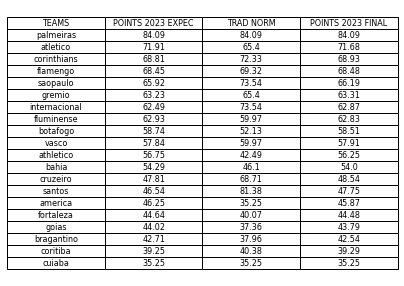

In [29]:
#FINAL DATAFRAME WITH VALUES AND PREDICTIONS
df_final = df_final.sort_values(by='POINTS 2023 FINAL', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.axis('off')
table_data = [df_final.columns.to_list()] + df_final.values.tolist()
ax.table(cellText=table_data, cellLoc='center', loc='center')
plt.show()

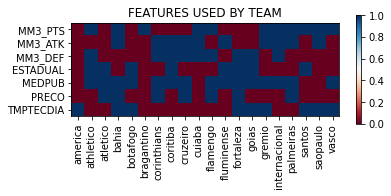

In [30]:
#TABLE GENERATOR
all_features = ['MM3_PTS', 'MM3_ATK', 'MM3_DEF', 'ESTADUAL', 'MEDPUB', 'PRECO', 'TMPTECDIA']
df_features = pd.DataFrame(index = teams, columns=all_features)
for team in teams:
    bool_of_features = []
    for feature in all_features:
        if feature in features_by_club[teams.index(team)]:
            bool_of_features.append(1);
        else:
            bool_of_features.append(0)
    df_features.loc[team] = bool_of_features
    
df_features = df_features.transpose()
df_features_num = df_features.astype(float).values
fig, ax = plt.subplots()
im = ax.imshow(df_features_num, cmap = 'RdBu', interpolation='nearest')

ax.set_xticks(range(0,20))
ax.set_yticks(range(0,7))
ax.set_xticklabels(teams, rotation = 90)
ax.set_yticklabels(all_features)

ax.set_title("FEATURES USED BY TEAM")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5)

plt.show()

In [31]:
#FEATURE COUNTING
for feature in all_features:
    print(feature + " was used in: " + str(sum(list(df_features.transpose()[feature]))) + " clubs.")

MM3_PTS was used in: 11 clubs.
MM3_ATK was used in: 10 clubs.
MM3_DEF was used in: 9 clubs.
ESTADUAL was used in: 8 clubs.
MEDPUB was used in: 15 clubs.
PRECO was used in: 7 clubs.
TMPTECDIA was used in: 9 clubs.
